In [1]:
import keras
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import keras.datasets.mnist as mnist

In [4]:
seed = 7
np.random.seed(seed)

In [5]:
num_classes = 10

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [8]:
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [9]:
def preprocess(image):
    return cv2.resize(image, dsize=(227, 227), interpolation=cv2.INTER_LINEAR)

In [10]:
def batchPreprocess(images):
    images = np.empty([train_images.shape[0], 227, 227], train_images.dtype)
    for i in range(images.shape[0]):
        np.copyto(images[i], preprocess(train_images[i]))
    return images

In [11]:
train_images = batchPreprocess(train_images)
test_images = batchPreprocess(test_images)
train_images.shape, train_images.shape

KeyboardInterrupt: 

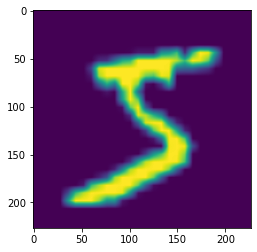

In [12]:
plt.imshow(train_images[0])

In [13]:
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))
test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

In [14]:
model = keras.Sequential()
model.add(Conv2D(96, (11, 11), strides=(4, 4), input_shape=(227, 227, 1), padding='valid', activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu', kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        11712     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

In [20]:
model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.1)

Epoch 1/50
 69/844 [=>............................] - ETA: 34s - loss: nan - accuracy: 0.1103

KeyboardInterrupt: 